## Ejercicio 1
##### A)  Interpole los puntos:
p1 = (5.4, 3.2)
p2_i = (9.5, 0.7)
p3 = (12.3, -3.6)
De estos, el punto p2i
  debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.

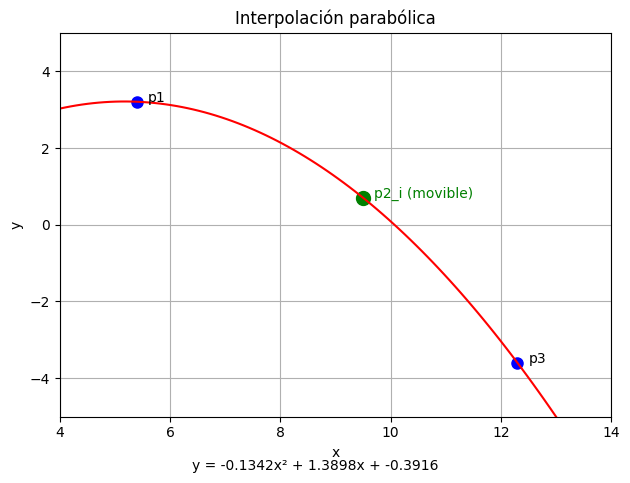

interactive(children=(FloatSlider(value=9.5, description='x:', max=12.0, min=6.0), FloatSlider(value=0.7, desc…

Usa los controles deslizantes para mover el punto p2_i


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton

# Usar el backend más simple de matplotlib
%matplotlib inline

# Puntos iniciales
p1 = (5.4, 3.2)
p2_i = [9.5, 0.7]
p3 = (12.3, -3.6)

# Función para calcular los coeficientes de la parábola
def calcular_coeficientes(puntos):
    x = [p[0] for p in puntos]
    y = [p[1] for p in puntos]
    A = np.array([[x[0]**2, x[0], 1],
                  [x[1]**2, x[1], 1],
                  [x[2]**2, x[2], 1]])
    b = np.array([y[0], y[1], y[2]])
    return np.linalg.solve(A, b)

def actualizar_grafico():
    plt.clf()  # Limpia la figura actual

    # Graficar puntos
    plt.plot(p1[0], p1[1], 'bo', markersize=8)
    plt.plot(p2_i[0], p2_i[1], 'go', markersize=10)
    plt.plot(p3[0], p3[1], 'bo', markersize=8)

    # Etiquetar puntos
    plt.text(p1[0]+0.2, p1[1], 'p1')
    plt.text(p2_i[0]+0.2, p2_i[1], 'p2_i (movible)', color='green')
    plt.text(p3[0]+0.2, p3[1], 'p3')

    # Calcular y graficar parábola
    coef = calcular_coeficientes([p1, p2_i, p3])
    x_min, x_max = 4, 14
    x_parabola = np.linspace(x_min, x_max, 100)
    y_parabola = coef[0] * x_parabola**2 + coef[1] * x_parabola + coef[2]
    plt.plot(x_parabola, y_parabola, 'r-')

    plt.title('Interpolación parabólica')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.xlim(4, 14)
    plt.ylim(-5, 5)

    # Mostrar la ecuación
    ecuacion = f"y = {coef[0]:.4f}x² + {coef[1]:.4f}x + {coef[2]:.4f}"
    plt.figtext(0.5, 0.01, ecuacion, ha='center')

    plt.tight_layout()
    plt.show()

# Mostrar gráfico inicial
actualizar_grafico()

# Función para seleccionar y mover el punto
def seleccionar_punto():
    from ipywidgets import interact, FloatSlider

    @interact(
        x=FloatSlider(value=p2_i[0], min=6, max=12, step=0.1, description="x:"),
        y=FloatSlider(value=p2_i[1], min=-4, max=4, step=0.1, description="y:")
    )
    def actualizar(x, y):
        p2_i[0] = x
        p2_i[1] = y
        actualizar_grafico()

# Usar widgets para mover el punto (más ligero que eventos del ratón)
seleccionar_punto()

print("Usa los controles deslizantes para mover el punto p2_i")